In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
acetone_1 = pd.read_csv('tests_ac4.csv', delimiter=",")
acetone_1 = acetone_1.drop(acetone_1.index[0:31])
acetone_1.head()

,##General Project Information
31,Sensor ID : 092F3613
32,Sensor Type : 5
33,Sensor Valid : 1
34,21/06/2019 06:32:12 p. m.;0;14.9058149058149;1...
35,21/06/2019 06:32:32 p. m.;0;15.8582631426082;1...


In [20]:
#Función para extraer los valores de conductividad de cada sensor
def measurements(dataframe, inicio, duracion):
    sensors = dataframe.iloc[inicio:inicio + duracion,:].values
    data = []
    for sensor in sensors:
        line = sensor[0].split(";")
        line = [float(i) for i in line[2:-1]]
        data.append(line)
    return data

In [22]:
data = measurements(acetone_1, 3, 15)
data

[[14.9058149058149,
  17.115987460815,
  21.2121212121212,
  25.7183231276496,
  27.729812087354,
  29.9014238773275,
  29.1978609625668,
  28.6915396741986,
  27.2727272727273,
  26.1244019138756,
  23.6363636363636,
  21.6752679634776,
  18.3838383838384,
  15.6581588758245,
  12.2257053291536,
  9.73262032085561,
  8.69288329883776,
  6.85585133098945,
  5.23038605230386,
  4.00616332819723,
  3.4161296377401,
  2.87247474747475,
  2.66289504486929,
  2.46701608530634,
  2.59604412324078,
  2.75604462167483,
  3.24845311756307,
  3.85674931129477,
  4.95867768595041,
  6.41296687808316,
  9.04123199205167,
  12.2257053291536],
 [15.8582631426082,
  18.6602870813397,
  23.6363636363636,
  29.1978609625668,
  32.2314049586777,
  35.4545454545455,
  35.4545454545455,
  35.9683794466403,
  33.9975093399751,
  32.8717639975918,
  30.6397306397306,
  28.3636363636364,
  24.0953221535746,
  20.5960015088646,
  16.2210338680927,
  12.8259337561663,
  11.2045967576442,
  8.97583429228999,
  

In [23]:
#Función para extraer los valores de conductividad de todos los sensores en una muestra
def sample(dataframe,inicio):
    sample_data = []
    for i in range(0,12): #12 = al número de sensores en el arreglo.
        data = measurements(dataframe, inicio, 15) #12 = al número de ciclos térmicos por sensor, agregar como parámetro.
        if [] in data:
            #data[-1] = [0]*32
            inicio += 17
        else:
            inicio += 18
            
        while [] in data:
            data.pop()
            
        sample_data.append(data)
    return sample_data, inicio

In [26]:
#Función para extraer el valor promedio de conductividad en cada bucle térmico de cada sensor 
def mean_conductivity(sample):
    values = []
    for sensor in sample:
        med = np.mean(sensor, axis=0)
        values.append(med)
    return values

In [27]:
#Función para extraer el valor promedio de conductividad en cada bucle térmico de cada sensor para todas las muestras
def all_samples(dataframe, inicio, sequ):
    start = inicio
    samples = []
    for i in range(0, sequ):
        sensors, ini = sample(dataframe, start)
        mean_sensor_cond = mean_conductivity(sensors)
        
        samples.append(mean_sensor_cond)
        start = ini + 12
    
    return samples, start

In [28]:
sensors, inicio = sample(acetone_1,3)
mean_sensor_cond = mean_conductivity(sensors)

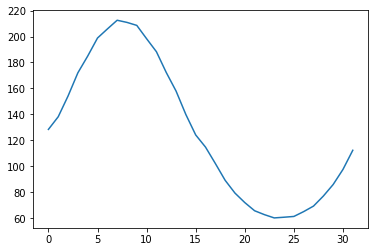

In [29]:
plt.plot(mean_sensor_cond[1]) #promedio del bucle térmico de cada sensor [sensor]

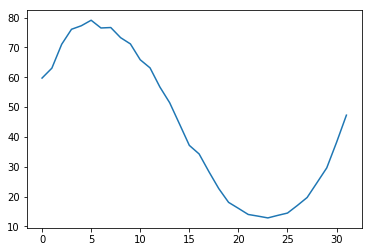

In [36]:
plt.plot(sensors[11][5]) #bucles térmicos de cada sensor, [sensor][bucle térmico]

In [38]:
samples, ini = all_samples(acetone_1, 3, 12) #extraer promedio de conductividad en el bucle térmico de cada sensor para todas las muestras

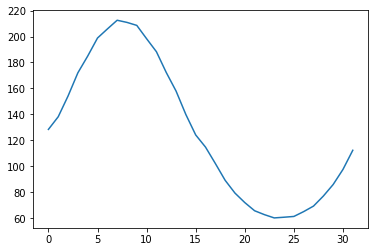

In [39]:
plt.plot(samples[0][1]) #promedio del bucle térmico de cada [muestra] para cada [sensor]

In [40]:
mean_sensor_cond[1]

array([128.45484197, 138.2143972 , 154.17339474, 172.040543  ,
       184.91704842, 198.83721072, 205.78396127, 212.53241633,
       210.873888  , 208.56946453, 198.30490952, 188.28650574,
       172.32451575, 157.99191364, 139.89373804, 124.19498912,
       114.82351144, 102.21598518,  89.24047007,  79.40157066,
        72.09394674,  65.80363063,  62.79643222,  60.27745401,
        60.81000243,  61.40822785,  65.14784414,  69.38931236,
        77.09106363,  85.99470765,  97.62358647, 112.37171092])

In [41]:
samples[0][1]

array([128.45484197, 138.2143972 , 154.17339474, 172.040543  ,
       184.91704842, 198.83721072, 205.78396127, 212.53241633,
       210.873888  , 208.56946453, 198.30490952, 188.28650574,
       172.32451575, 157.99191364, 139.89373804, 124.19498912,
       114.82351144, 102.21598518,  89.24047007,  79.40157066,
        72.09394674,  65.80363063,  62.79643222,  60.27745401,
        60.81000243,  61.40822785,  65.14784414,  69.38931236,
        77.09106363,  85.99470765,  97.62358647, 112.37171092])

In [42]:
type(samples[0][1])

numpy.ndarray

In [43]:
def concat_samples(samples):
    instances = []
    for array in samples:
        instance = np.concatenate((array), axis=0)
        instances.append(instance)
    return(instances)

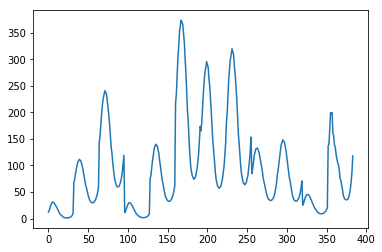

In [51]:
instances = concat_samples(samples) #Extraer valores estadísticos, media, varianza, desv. estandar, min, max 
plt.plot(instances[10])

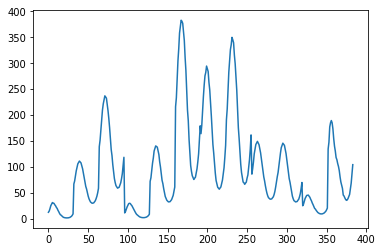

In [50]:
plt.plot(instances[11])

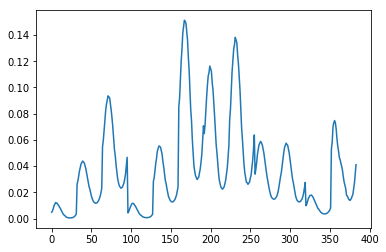

In [62]:
from sklearn import preprocessing #pruebas para normalizar.

norm_instances = [] #cambiar por instances.

for array in instances:
    array = preprocessing.normalize([array])
    norm_instances.append(array[0])
    
plt.plot(norm_instances[11])

In [63]:
num_sens = [str(i) for i in range(1, 13)]

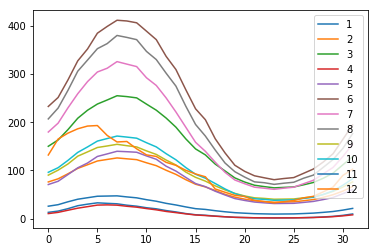

In [66]:
for array in samples[5]:
    plt.plot(array)
    plt.legend((num_sens), loc='upper right')

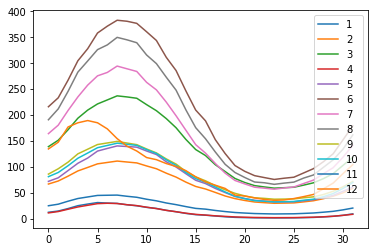

In [65]:
for array in samples[11]:
    plt.plot(array)
    plt.legend((num_sens), loc='upper right')

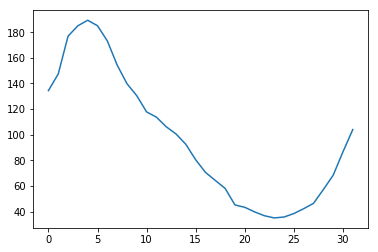

In [68]:
plt.plot(samples[11][11])

In [69]:
ac2_data = pd.DataFrame(data=instances)

In [70]:
ac2_data['clase'] = 4

In [71]:
ac2_data.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,clase
0,16.429927,19.056286,24.042697,29.385130,31.584535,33.634495,32.590284,32.002880,29.908218,28.466038,...,44.055460,44.515192,44.937724,48.017243,61.935664,77.604075,82.286958,93.660097,127.646454,4
1,12.368149,14.675211,19.189581,24.137875,26.605378,28.567369,27.593274,26.898361,24.638474,23.014995,...,14.928558,15.407274,16.312555,18.718000,21.515942,27.379604,32.817807,43.814955,56.623854,4
2,12.189187,14.571057,19.234946,24.537176,27.282786,29.611506,28.534175,27.560903,25.143852,23.318969,...,25.078773,25.604976,26.054191,28.074175,31.690883,41.752960,46.416980,61.539960,84.811043,4
3,12.199588,14.616578,19.424779,24.898440,27.861739,30.426380,29.283282,28.378037,25.733549,23.796091,...,19.791680,20.887578,21.701685,25.049250,27.691469,34.718882,41.599786,54.183158,68.865299,4
4,12.498265,15.045538,19.986794,25.863221,29.074581,31.853309,30.531972,29.524556,26.856319,24.835016,...,27.969274,29.162917,29.819469,35.084807,37.963502,47.431431,55.996768,72.368900,95.382931,4


In [72]:
ac2_data.to_csv('muestras04ml.csv')